GMM with Full Covariance - Training Accuracy: 0.99, Test Accuracy: 1.00
Training Confusion Matrix:
[[284   2]
 [  4 271]]
Test Confusion Matrix:
[[34  0]
 [ 0 46]]


<ipython-input-9-0b920072574c>:45: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


GMM with Diagonal Covariance - Training Accuracy: 0.97, Test Accuracy: 1.00
Training Confusion Matrix:
[[274  12]
 [  3 272]]
Test Confusion Matrix:
[[34  0]
 [ 0 46]]


<ipython-input-9-0b920072574c>:45: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
<ipython-input-9-0b920072574c>:45: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
<ipython-input-9-0b920072574c>:45: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


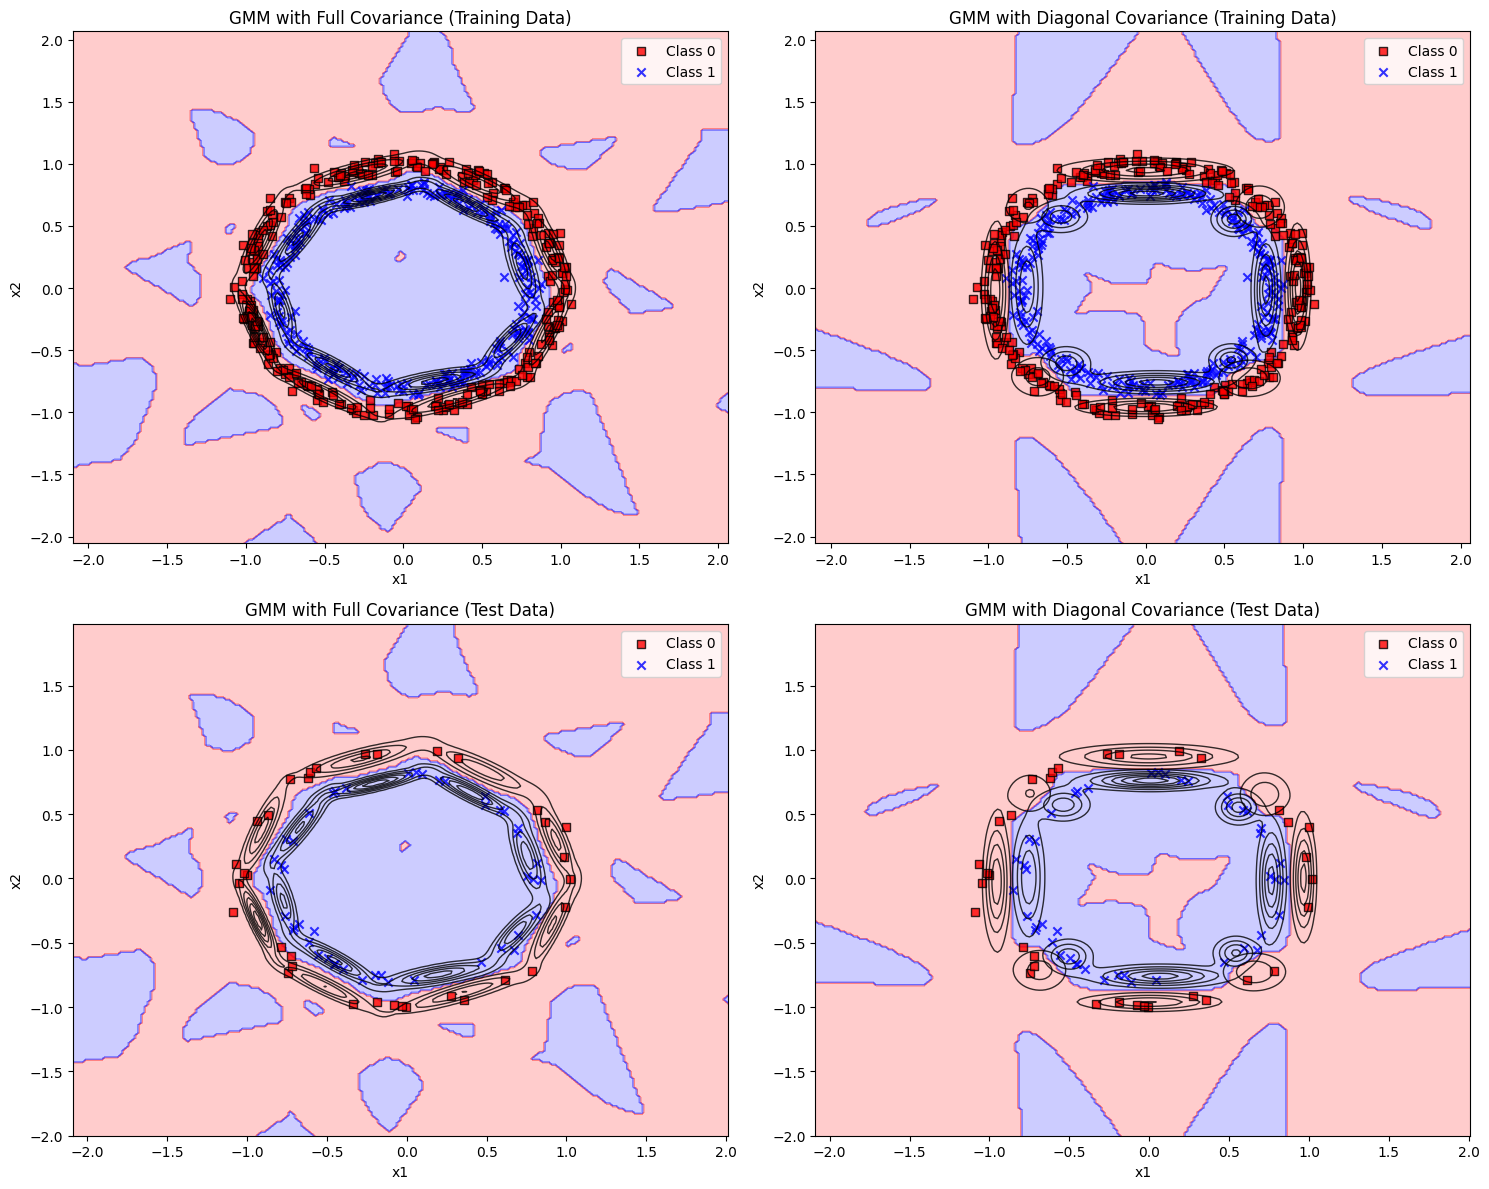


Accuracy Table:
                          Model  Training Accuracy  Test Accuracy
0      GMM with Full Covariance           0.989305            1.0
1  GMM with Diagonal Covariance           0.973262            1.0


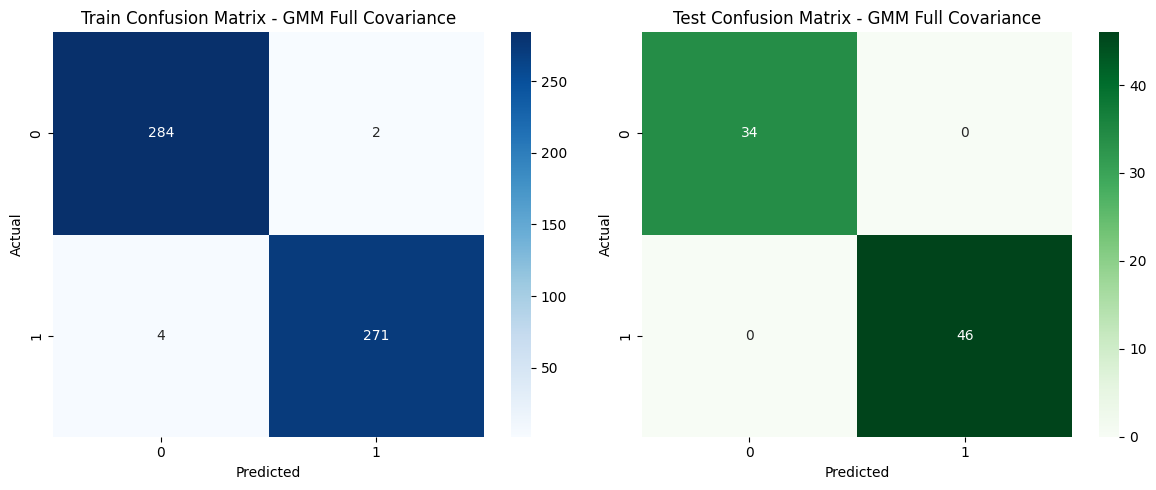

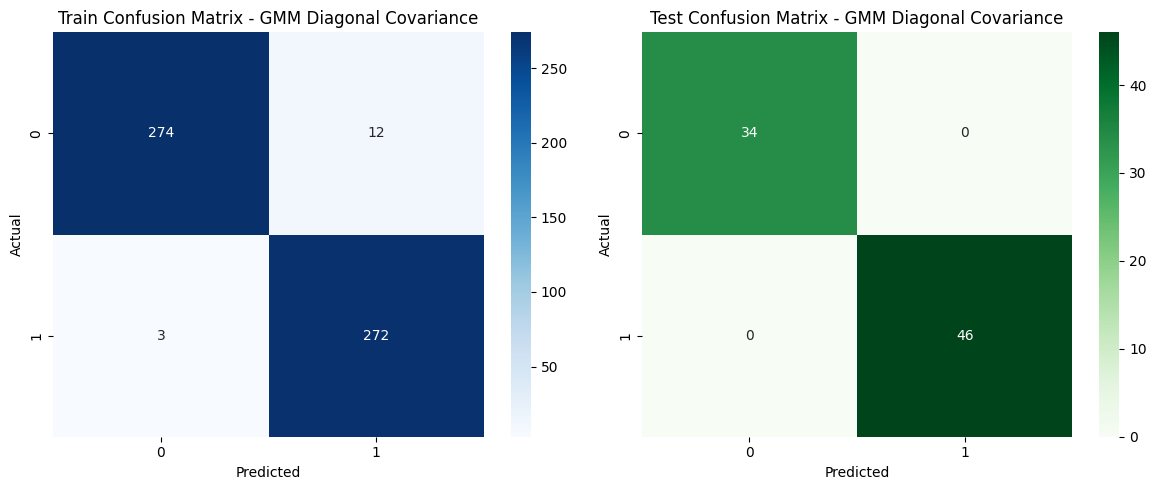

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# Load the datasets
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

# Split into inputs (X) and labels (y)
X_train = train_data[['x1', 'x2']].values
y_train = train_data['label'].values

X_test = test_data[['x1', 'x2']].values
y_test = test_data['label'].values

# Helper function to plot decision regions
def plot_decision_regions(X, y, classifier, title, ax, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)  # Adjusted alpha for decision surface

    # Plot level curves for each class with increased visibility
    for i, gmm in enumerate(classifier.gmms):
        Z_density = np.exp(gmm.score_samples(np.array([xx1.ravel(), xx2.ravel()]).T))
        Z_density = Z_density.reshape(xx1.shape)
        # Increase the number of levels and make them more distinct
        ax.contour(xx1, xx2, Z_density, levels=6, colors='black', linewidths=1, alpha=0.8)  # Adjusted alpha and line width

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=colors[idx],
                   marker=markers[idx], label=f'Class {cl}', edgecolor='black')

    ax.set_title(title)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.legend()

# GMM Classifier wrapper
class GMMClassifier:
    def __init__(self, n_components, covariance_type='full'):
        self.gmms = []
        self.n_components = n_components
        self.covariance_type = covariance_type

    def fit(self, X, y):
        self.gmms = []
        self.classes_ = np.unique(y)
        for cl in self.classes_:
            gmm = GaussianMixture(n_components=self.n_components, covariance_type=self.covariance_type)
            gmm.fit(X[y == cl])
            self.gmms.append(gmm)

    def predict(self, X):
        likelihood = np.array([gmm.score_samples(X) for gmm in self.gmms]).T
        return self.classes_[np.argmax(likelihood, axis=1)]

# Evaluation function
def evaluate_classifier(X_train, y_train, X_test, y_test, classifier, title, ax):
    # Fit and predict for training data
    classifier.fit(X_train, y_train)
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f'{title} - Training Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}')

    # Training confusion matrix
    train_cm = confusion_matrix(y_train, y_train_pred)
    print('Training Confusion Matrix:')
    print(train_cm)

    # Test confusion matrix
    test_cm = confusion_matrix(y_test, y_test_pred)
    print('Test Confusion Matrix:')
    print(test_cm)

    # Plot decision regions for training data
    plot_decision_regions(X_train, y_train, classifier, f'{title} (Training Data)', ax)

    return train_accuracy, test_accuracy, train_cm, test_cm

# Initialize classifiers and subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Create a list to store accuracies and confusion matrices
results = []

# GMM Classifier with Full Covariance
gmm_full = GMMClassifier(n_components=8, covariance_type='full')
train_acc_full, test_acc_full, train_cm_full, test_cm_full = evaluate_classifier(X_train, y_train, X_test, y_test, gmm_full, 'GMM with Full Covariance', axs[0, 0])
results.append(('GMM with Full Covariance', train_acc_full, test_acc_full))

# GMM Classifier with Diagonal Covariance
gmm_diag = GMMClassifier(n_components=8, covariance_type='diag')
train_acc_diag, test_acc_diag, train_cm_diag, test_cm_diag = evaluate_classifier(X_train, y_train, X_test, y_test, gmm_diag, 'GMM with Diagonal Covariance', axs[0, 1])
results.append(('GMM with Diagonal Covariance', train_acc_diag, test_acc_diag))

# Plot decision regions for test data
plot_decision_regions(X_test, y_test, gmm_full, 'GMM with Full Covariance (Test Data)', axs[1, 0])
plot_decision_regions(X_test, y_test, gmm_diag, 'GMM with Diagonal Covariance (Test Data)', axs[1, 1])

plt.tight_layout()
plt.show()

# Create a DataFrame for accuracies and display it as a table
accuracy_df = pd.DataFrame(results, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
print("\nAccuracy Table:")
print(accuracy_df)

# Plot confusion matrices using heatmaps
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(train_cm_full, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title('Train Confusion Matrix - GMM Full Covariance')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(test_cm_full, annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title('Test Confusion Matrix - GMM Full Covariance')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Plot confusion matrices for diagonal covariance
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(train_cm_diag, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title('Train Confusion Matrix - GMM Diagonal Covariance')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(test_cm_diag, annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title('Test Confusion Matrix - GMM Diagonal Covariance')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()